# z-Transformation und z-transformierte Kovarianz

Datum: 8.1.2019

Literatur: Meindl, Claudia (2011): Methodik für Linguisten. Tübingen: Narr Verl., Kapitel 11.

## 1. Wdh. Tutorial - die z-Transformation

Betrachten wir noch einmal den Classroom-Datensatz:

In [4]:
classroom <- read.csv2("Classroom.csv")

In [5]:
class.male   <- classroom[which(classroom$Geschlecht == 1),]
class.female <- classroom[which(classroom$Geschlecht == 2),]

In [7]:
print(head(classroom))

  Geschlecht Gewicht
1          1     140
2          1     145
3          1     160
4          1     190
5          1     155
6          1     165


Die Formel für die z-Transformation ist ja:   

$$\frac{x_i - \bar{x}}{s}$$ 
 
(x-mittelwert)/standardabweichung  

z-Transformation für den Wert 140 bzgl. aller Gewichte der Klasse:

In [10]:
classroom$Gewicht[1]

[1] 140

In [11]:
(140-mean(classroom$Gewicht))/sd(classroom$Gewicht)

[1] -0.2170305

In [12]:
scale(classroom$Gewicht)[1]

[1] -0.2170305

Durch die z-Transformation können metrische Mess- und Zahlenwerte standardisiert, aus den ursprünglichen Werten (hier 140) werden standardisierte z-Werte.

Verteilung der z-Werte:  
$\bar{x} = 0$  
$s_x = 1$

## Kreuzproduktsumme, Kovarianz, Korrelation (Pearson-Bravais)

Bislang haben wir einzelne Merkmalsausprägungen betrachtet  und Lage- sowie Streuungsparameter berechnet: univariate Analyse.

In dieser Einführung wollen wir zwei (hier: metrische) Merkmale betrachten (bivariate Analyse) und der Frage nachgehen, ob und wie linearer Zusammenhang zwischen den Merkmalen beschrieben werden kann.

In [66]:
x <- c(1,2,1,3,5,10,14,16,19,20)
y <- c(20,18,15,12,8,5,3,-1,-4,-10)

p1 <- data.frame(x,y)
print(p1)

    x   y
1   1  20
2   2  18
3   1  15
4   3  12
5   5   8
6  10   5
7  14   3
8  16  -1
9  19  -4
10 20 -10


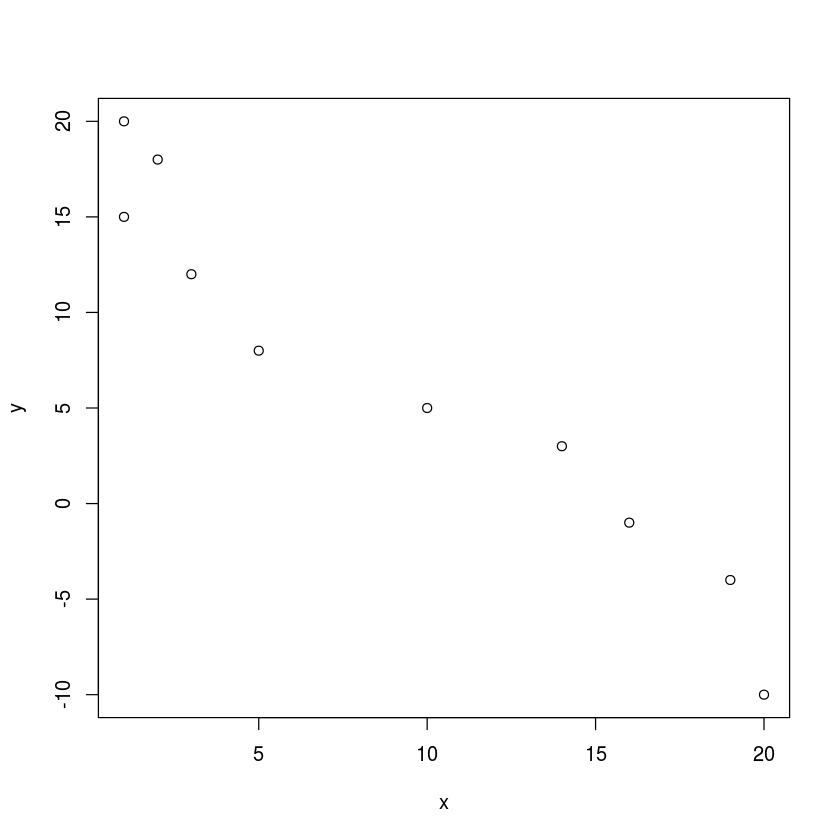

In [17]:
plot(x,y)

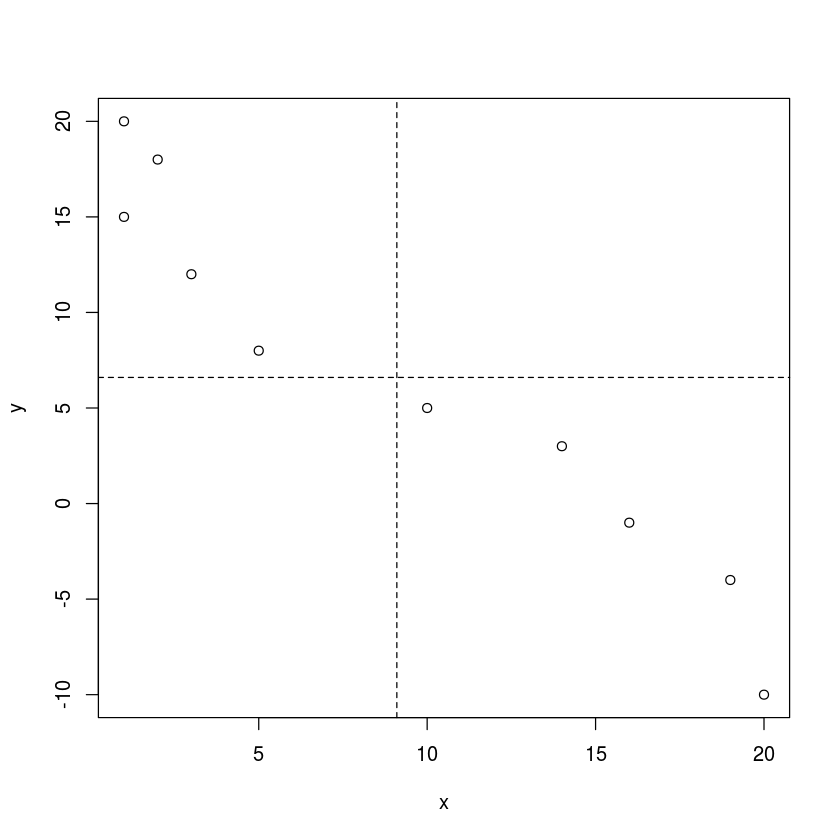

In [67]:
plot(x,y)
abline(v=mean(x),lty=2)  # Ergänzt arithmetisches Mittel von x als vertikale Linie
abline(h=mean(y), lty=2) # Ergänzt arithmetisches Mittel von y als horizontale Linie

Die Datenpaare $(x_i | y_i)$ links oben (für i = 1 bis 5) weisen:   
unterdurchschnittliche x-Werte auf, $x_i-\bar{x}$ ist negativ  
überdurchschnittliche y-Werte auf, $y_i-\bar{y}$ ist positiv

Kreuzprodukte sind hier negativ:
$$(x_i - \bar{x}) (y_i - \bar{y})$$

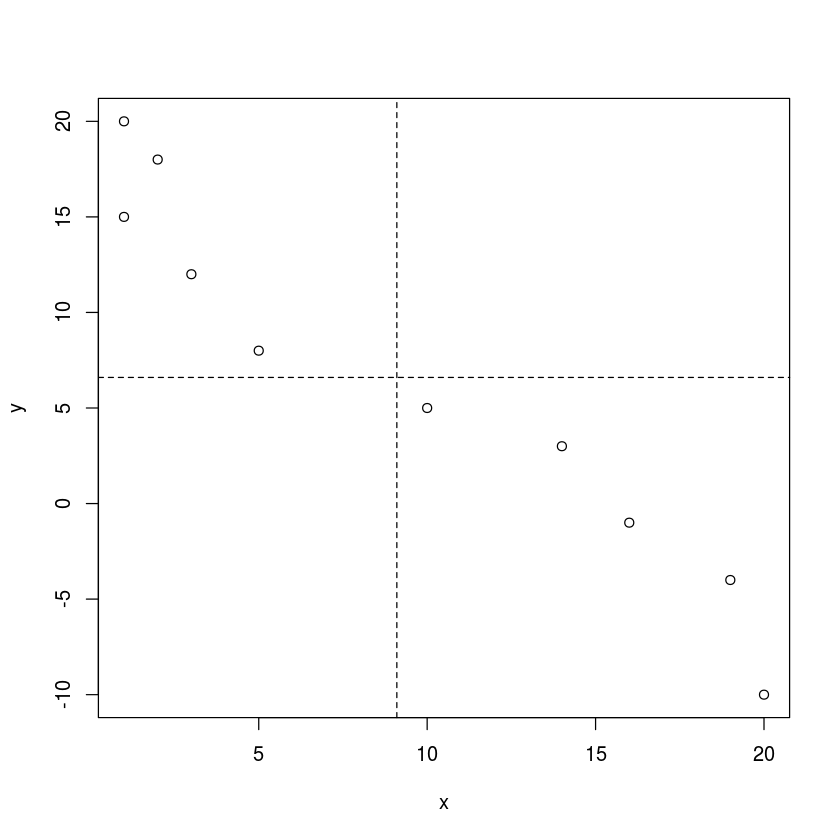

In [20]:
plot(x,y)
abline(v=mean(x),lty=2)  # Ergänzt arithmetisches Mittel von x als vertikale Linie
abline(h=mean(y), lty=2) # Ergänzt arithmetisches Mittel von y als horizontale Linie

Die Datenpaare $(x_i | y_i)$ rechts unten (für i = 6 bis 10)  weisen:  
überdurchschnittliche x-Werte auf, $x_i-\bar{x}$ ist positiv    
unterdurchschnittliche y-Werte auf, $y_i-\bar{y}$  ist negativ  

Kreuzprodukte sind hier negativ:
$$(x_i - \bar{x}) (y_i - \bar{y})$$

Die Kreuzproduktsumme, also die Summe aller Kreuzprodukte für i = 1 bis 10, ist hier negativ:

$$KPS_{xy} = \sum_{i=1}^n{(x_i - \bar{x}) (y_i - \bar{y})} $$

In [26]:
KPS <- function (x,y) {
   sum((x-mean(x))*(y-mean(y)))
}

In [27]:
KPS(x,y)

[1] -653.6

Hier ein Beispiel für eine positive KPS:

In [30]:
x2 <- c(1,2,1,3,5,10,14,16,19,20)
y2 <- rev(y)

p2 <- data.frame(x2,y2)
print(p2)

   x2  y2
1   1 -10
2   2  -4
3   1  -1
4   3   3
5   5   5
6  10   8
7  14  12
8  16  15
9  19  18
10 20  20


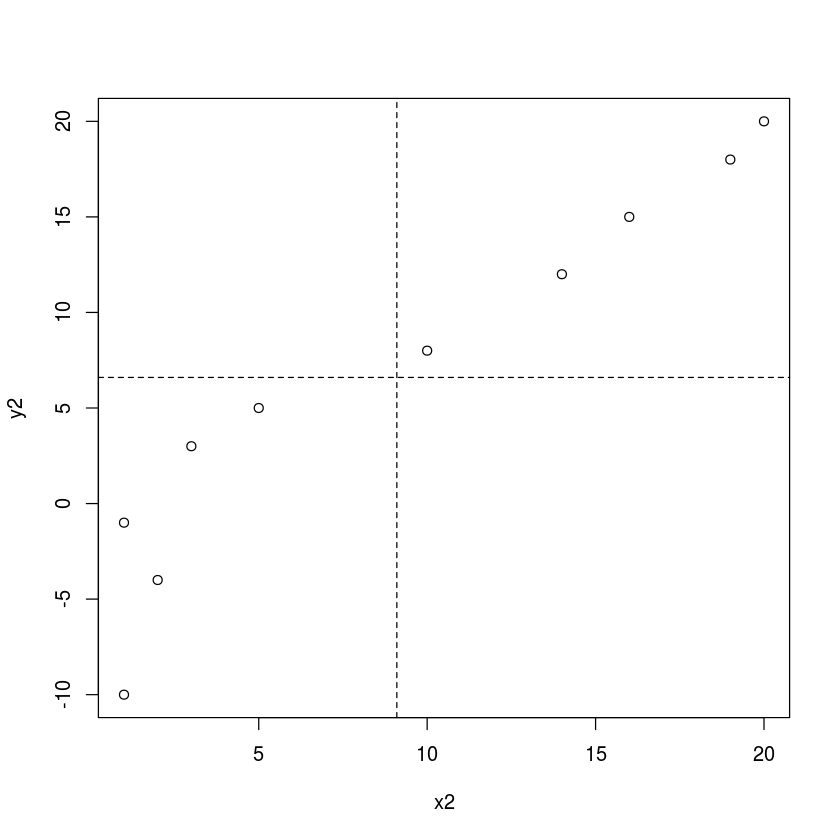

In [31]:
plot(x2,y2)
abline(v=mean(x2),lty=2)
abline(h=mean(y2), lty=2)

Die Datenpaare links unten weisen   
unterdurchschnittliche x-Werte auf, $x_i-\bar{x}$ ist negativ  
unterdurchschnittliche y-Werte auf, $y_i-\bar{y}$ ist negativ   

Die Datenpaare rechts oben weisen  
überdurchschnittliche x-Werte auf, $x_i-\bar{x}$ ist positiv  
überdurchschnittliche y-Werte auf, $y_i-\bar{y}$ ist positiv   

Alle Kreuzprodukte sind positiv, so auch deren Summe:

In [33]:
KPS(x2,y2)

[1] 644.4

#### Nun ein Beispiel für KPS um die 0:

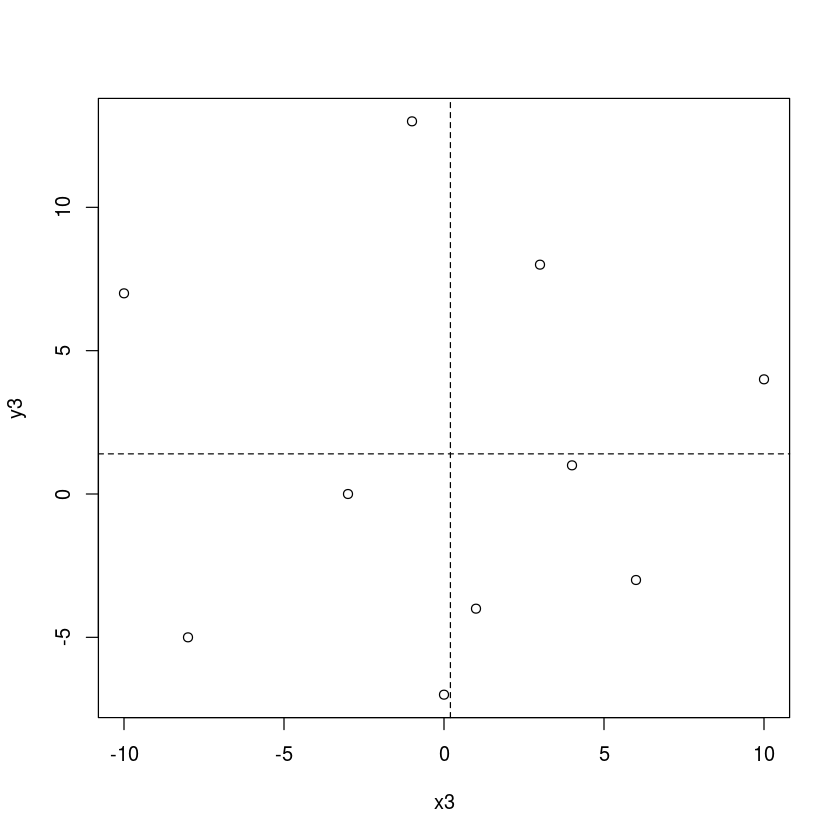

In [35]:
x3 <- c(6,3,4,-8,-1,10,-10,0,1,-3)
y3 <- c(-3,8,1,-5,13,4,7,-7,-4,0)

plot(x3,y3)
abline(v=mean(x3),lty=2)		
abline(h=mean(y3), lty=2)

Datenpaare finden sich hier in allen Quadranten, keine besonderen Ausreißer

Die Summe aller positiven und negativen Kreuzprodukte ergibt hier:

In [36]:
KPS(x3,y3)

[1] 0.2

### Kovarianz

Während die KPS die Abweichungswerte vom Mittelwert summiert, stellt die Kovarianz das Mittlere Kreuzprodukt dar, teilt die KPS also durch n:

$$s_{xy} = \frac{1}{n}\cdot\sum_{i=1}^n{(x_i - \bar{x}) (y_i - \bar{y})} $$

In [40]:
KOVAR <- function (x,y) {
   sum((x-mean(x))*(y-mean(y)))/(length(x))
}

In [45]:
KOVAR(x,y)

[1] -65.36

KPS und KOVAR sind sensibel bzgl. der Messeinheiten. Jegliche Transformation der x und/oder y-Werte, z.B. die Transformation von cm in m, wirkt sich direkt auf das Ergebnis der Berechnungen aus:

In [68]:
KOVAR(x,y)

[1] -65.36

### Produkt-Moment-Korrelation nach Pearson und Bravais

Wie bei der z-Transformation bereits gesehen, können statistische Kennwerte standardisiert werden. Die Kovarianz mit z-transformierten Variablen sähe folgendermaßen aus:

$$r_{xy} = \frac{
\frac{1}{n}\cdot\sum_{i=1}^n{(x_i - \bar{x}) (y_i - \bar{y})}}
{\sqrt{\frac{1}{n}\cdot\sum_{i=1}^n{(x_i - \bar{x})^2}} 
\cdot \sqrt{\frac{1}{n}\cdot\sum_{i=1}^n{(y_i - \bar{y})^2}}} $$

In [52]:
KORR <- function (x,y) {
   (sum((x-mean(x))*(y-mean(y)))/(length(x)))/
    (sqrt((sum((x-mean(x))^2))/length(x))*
     sqrt((sum((y-mean(y))^2))/length(x)))
}

In [58]:
KORR(x,y)

[1] -0.9658639

$r_{xy}$ ist hier der Korrelationskoeffizient, für den gilt:  
$-1 \leq r_{xy} \leq 1$

Er gibt Aussage über die Stärke und die Richtung eines *linearen Zusammenhangs*.   
Negativ: negativer linearer Zusammenhang (oder indirekter Zusammenhang): z.B. je kleiner x, desto größer y  
Positiv: positiver linearer Zusasammenhang (oder direkter Zusammenhang): z.B. je größer x, desto größer y

Stärke: Die Stärke des linearen Zusammehangs gibt der Betrag des Korrelationseffizienten wieder, der zwischen 0 und 1 liegt.

|KORR(x3,y3)|=0,000561 wäre ein Beispiel für eine äußerst niedrige Korrelation. Es besteht kein linearer Zusammenhang.

|KORR(x,y)|= 0,9657 wäre ein Beispiel für eine sehr hohe Korrelation.

<img src="Meindl_217.JPG">
Abb.: Meindl 2011, S. 217.

Abb. 11d: Beispiel für Zusammenhang, aber nicht-linear  
Abb. 11e: Beispiel für Ausreißer  
Abb. 11f: Beispiel für zwei Gruppen, die getrennt voneinander analysiert werden sollten

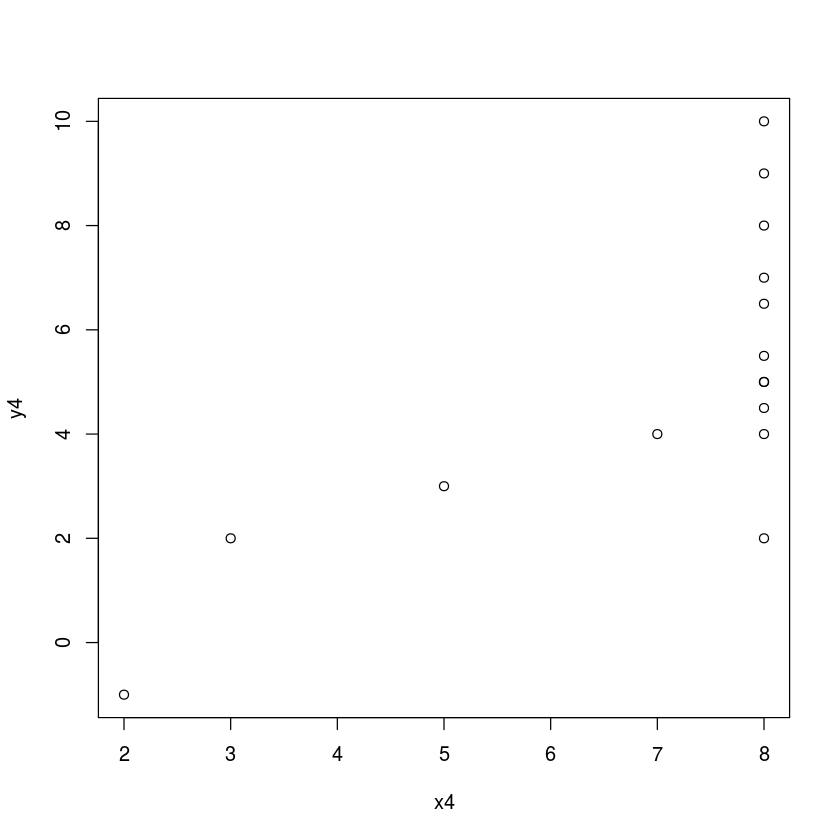

In [59]:
x4 <- c(3,7,8,8,8,8,8,8,8,8,2,8,5,8,8)
y4 <- c(2,4,5,5,4,7,9,10,8,2,-1,4.5,3,5.5,6.5)

plot(x4,y4)

Beispiel für Heteroskedazität. Hier sind vielen gleichen x-Werten unterschiedliche y-Werte zugeordnet, was die Bedeutsamkeit der Prüfung auf linearen Zusammenhang beeinträchtigt.

Voraussetzungen der Produkt-Moment-Korrelation nach Pearson und Bravais:
- mindestens intervallskalierte und normalverteilte Variablen
- linearer Zusammenhang
- Homoskedazität
- keine Ausreißerwerte

Es herrschen Annahmen bzgl. der Verteilung der Variablen; werden diese erfüllt, ist eine Berechnung des Koeffizienten sinnvoll. 
Im Gegensatz zu verteilungsfreien oder nicht-parametrischen Testverfahren handelt es sich hier um einen *parametrischen Test*.

## Funktionen in R

In R werden für die Koviaranz und die Korrelation nach Pearson und Bravais folgende Funktionen bereitgestellt:

In [60]:
cov(x,y)

[1] -72.62222

In [61]:
cor(x,y)

[1] -0.9658639

Anstatt der Division durch $n$ wird hier durch $(n-1)$ geteilt, wie wir es auch schon bei `var()` und `sd()` gesehen haben (Unterschied zwischen Stichproben- und Populationsparameter).

In [65]:
((sum((x-mean(x))*(y-mean(y))))/(length(x)-1))/(sd(x) * sd(y)) == cor(x,y)

[1] TRUE